# Laboratorio 1

------------

María Marta Ramirez Gil  21342                                   
Gustavo Andrés Gonzalez Pineda 21438  

Inteligencia Artificial                                                   
Universidad del Valle de Guatemala

------------

# Task 1 - Regresión Lineal

1. **Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación $y = 2w₁X₁ + 3w₂X₂ + 1$, ¿cuál es la interpretación del coeficiente $3w₂$ en el contexto del modelo?**
En el contexto de un modelo de regresión lineal, los coeficientes asociados a cada característica proporcionan información sobre la contribución relativa de esa característica. Por lo que el coeficiente $3w_2$ se refiere a la contribución de la característica $X_2$ al valor predicho de $y$. En otras palabras el coeficiente $3w_2$ indica cuánto cambia la predicción de $y$ por cada unidad de cambio en la característica $X_2$, asumiendo que todas las demás variables se mantienen constantes.

2. **Explica el concepto de *multicolinealidad* en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?**
La multicolinealidad ocurre cuando dos o más variables predictoras en un modelo están altamente correlacionadas entre sí. Quiere decir que existe una relación linela fuerte entre al menos dos variable indepenedientes. Asimismo la multicolinealidad puede afectar la interpretación de los coeficientes de regresión individuales.

------------

# Task 2 - Clasificación de Sitios de Phishing Regresión Logística y KNN

## Importacion de librerias necesarias
numpy, pandas, matplotlib y seaborn

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import precision_score

## Abrir y definir el dataset
Se define como 'df'

In [36]:
df = pd.read_csv("dataset_phishing.csv", sep=",")

## Vista del dataset
Se puede eligir ver las columnas y ver el dataset como se prefiera

In [39]:
n = int(input("ingrese el numero de rows:"))
df.head(n)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,1
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,0
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,1
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,0
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,0


## Encoding
Solo fue necesario aplicar el encoding dummy a la columna 'status', ya que es la única variable categórica que representa un resultado binario. Esta elección se basó en la naturaleza de los datos y la estructura de las columnas. El encoding *dummy* permite representar la información de 'status' de manera binaria (0 o 1) de una manera efectiva y esencial para el modelado, ya que facilita la interpretación del resultado del modelo en un formato comprensible.

In [38]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
df.head(10)
# NO CORRER DE NUEVO PORQUE LOS DATOS SALEN NaN

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,1
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,0
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,1
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,0
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,0


## Balanceo de dataset
Se realizan diferentes examinaciones para encontrar si el data set esta propiamente balanceado

### Contar las clases
**(Resultado: Balanceado** ✅)

In [25]:
class_distribution = df['status'].value_counts()
print(class_distribution)

status
0    5715
1    5715
Name: count, dtype: int64


### Visualizacion de los datos
**(Resultado: Balanceado** ✅)

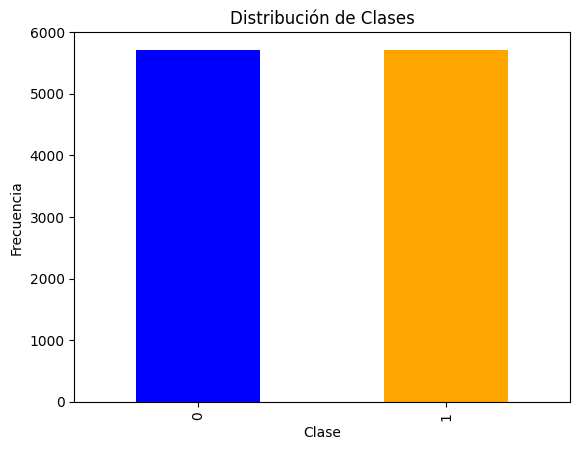

In [26]:
df['status'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

### Calcular porcentaje
**(Resultado: Balanceado** ✅)

In [27]:
class_percentage = df['status'].value_counts(normalize=True) * 100
print(class_percentage)

status
0    50.0
1    50.0
Name: proportion, dtype: float64


## Escalar variables
Se escalaron las columnas con un escalamiento Min-Max:
`'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_subdomains', 'ratio_digits_url', 'ratio_intHyperlinks', 'domain_registration_length', 'domain_age', 'web_traffic', 'page_rank'.`

In [40]:
# Lista de columnas a escalar
columnas_a_escalar = ['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_subdomains', 'ratio_digits_url', 'ratio_intHyperlinks', 'domain_registration_length', 'domain_age', 'web_traffic', 'page_rank']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado solo a las columnas seleccionadas
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

In [43]:
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0.015347,0.071429,0,0.086957,0.000000,0,0,0,0,...,0,1,0,0.001542,0.000854,0.000000,1,1,0.4,0
1,http://shadetreetechnology.com/V4/validation/a...,0.039902,0.090476,1,0.000000,0.000000,0,0,0,0,...,1,0,0,0.002615,0.448471,0.000000,0,1,0.2,1
2,https://support-appleld.com.secureupdate.duila...,0.069982,0.219048,1,0.130435,0.023256,0,1,2,0,...,1,0,0,0.000503,0.311656,0.541310,0,1,0.0,1
3,http://rgipt.ac.in,0.003683,0.033333,0,0.043478,0.000000,0,0,0,0,...,1,0,0,0.002112,0.000854,0.010004,0,0,0.3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0.026397,0.052381,0,0.043478,0.046512,0,0,0,0,...,0,1,0,0.007543,0.635341,0.000810,0,0,0.6,0
5,http://appleid.apple.com-app.es/,0.012277,0.095238,0,0.086957,0.023256,0,0,0,0,...,1,1,1,0.000034,0.000854,0.000000,0,1,0.0,1
6,http://www.mutuo.it,0.004297,0.038095,0,0.043478,0.000000,0,0,0,0,...,0,1,0,0.005732,0.585209,0.000000,0,0,0.1,0
7,http://www.shadetreetechnology.com/V4/validati...,0.042357,0.109524,1,0.043478,0.000000,0,0,0,0,...,1,0,0,0.002581,0.448471,0.000000,0,1,0.2,1
8,http://vamoaestudiarmedicina.blogspot.com/,0.018416,0.142857,0,0.043478,0.000000,0,0,0,0,...,1,1,0,0.012471,0.567282,0.000000,0,0,0.5,0
9,https://parade.com/425836/joshwigler/the-amazi...,0.056476,0.028571,0,0.000000,0.232558,0,0,0,0,...,1,0,0,0.004325,0.727922,0.000629,0,0,0.5,0


## Seleccion de Variables
status y lenght_url

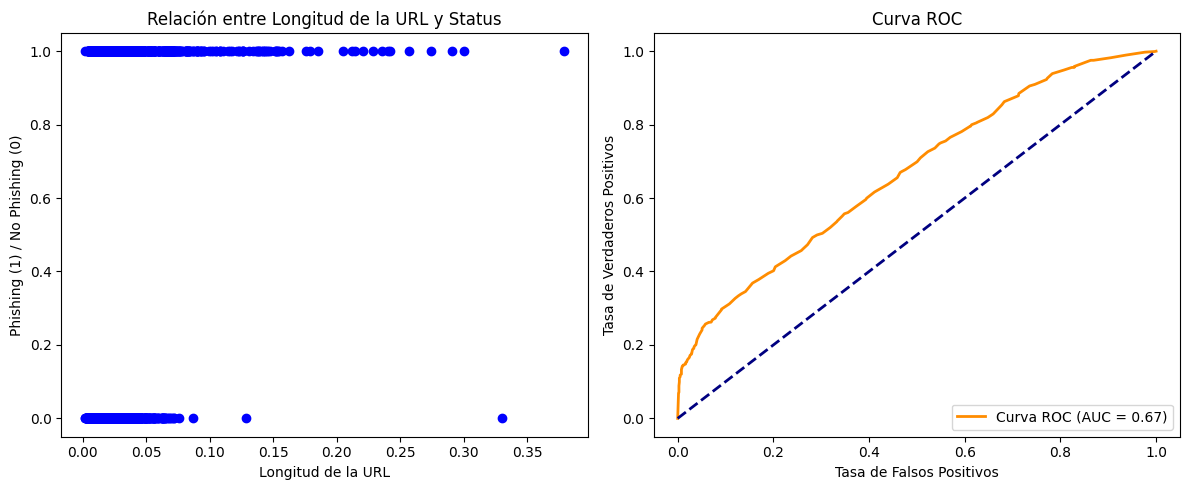

AUC-ROC Score: 0.67
AUC Precision-Recall: 0.69


In [76]:
# X es el conjunto de características y y es la variable objetivo (status)
X_train, X_test, y_train, y_test = train_test_split(df[['length_url', 'status']], df['status'], test_size=0.2, random_state=42)

# Entrenar modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train[['length_url']], y_train)

# Realizar predicciones de probabilidad
y_probs = model.predict_proba(X_test[['length_url']])[:, 1]

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_probs)

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calcular la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Visualizar la relación entre length_url y status
plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X_test['length_url'], y_test, color='blue', label='Ground Truth')
plt.xlabel('Longitud de la URL')
plt.ylabel('Phishing (1) / No Phishing (0)')
plt.title('Relación entre Longitud de la URL y Status')

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Imprimir AUC-ROC y AUC de la curva Precision-Recall
print(f'AUC-ROC Score: {roc_auc:.2f}')
print(f'AUC Precision-Recall: {pr_auc:.2f}')

## 4. Definición de la métrica de desempeño
Hemos optado por utilizar una métrica de dispersión para examinar la relación entre la longitud de la URL y la presencia de phishing. Al analizar la gráfica correspondiente (a la izquierda), se observa que, aunque no existe una correlación fuerte, hay un patrón discernible. Notamos que, en general, las URL con longitudes más cortas tienden a tener mayores probabilidades de ser clasificadas como "No Phishing" en comparación con aquellas que son identificadas como "Phishing". A medida que la longitud de la URL aumenta, disminuyen las probabilidades de que la URL no sea clasificada como phishing. Sin embargo, es importante destacar que la longitud más corta no garantiza la ausencia de phishing.

En cuanto a la gráfica ROC (a la derecha), se compara la tasa de verdaderos positivos con la tasa de falsos positivos. Observamos que la curva ROC tiene un AUC de 0.67, lo que indica que el modelo exhibe cierta capacidad discriminativa, aunque no es óptimo. En este contexto, se podría considerar la optimización del modelo mediante la exploración de otras características o técnicas para mejorar el AUC. La interpretación del AUC sugiere que el modelo tiene un rendimiento superior al azar, pero aún hay margen para la mejora.

## Otras comparaciones y metricas
Donde el AUC fue muy preciso pero la relacion no era del todo sensata.

#### IP Y STATUS CON PRECISION DEL MODELO

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df[['ip', 'status']], df['status'], test_size=0.2, random_state=42)

# Entrenar modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión
precision = precision_score(y_test, y_pred)

# Imprimir la precisión
print(f'Precisión del modelo: {precision:.2f}')

Precisión del modelo: 1.00


#### IP Y STATUS CON CURVA ROC

AUC-ROC Score: 1.00


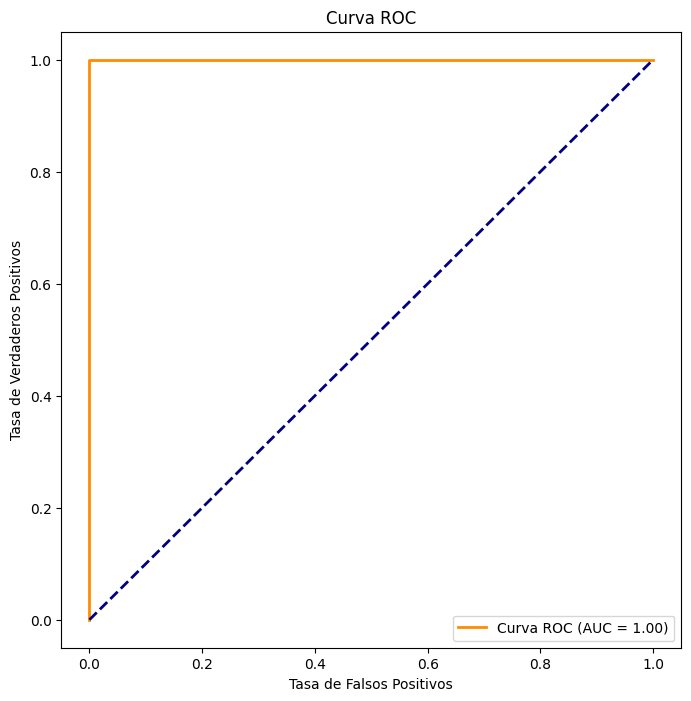

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df[['ip', 'status']], df['status'], test_size=0.2, random_state=42)

# Entrenar modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones de probabilidad
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_probs)

# Imprimir el AUC-ROC
print(f'AUC-ROC Score: {roc_auc:.2f}')

# Plotear la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

#### IP Y STATUS CON MATRIZ DE CONFUSION

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1157
           1       1.00      1.00      1.00      1129

    accuracy                           1.00      2286
   macro avg       1.00      1.00      1.00      2286
weighted avg       1.00      1.00      1.00      2286



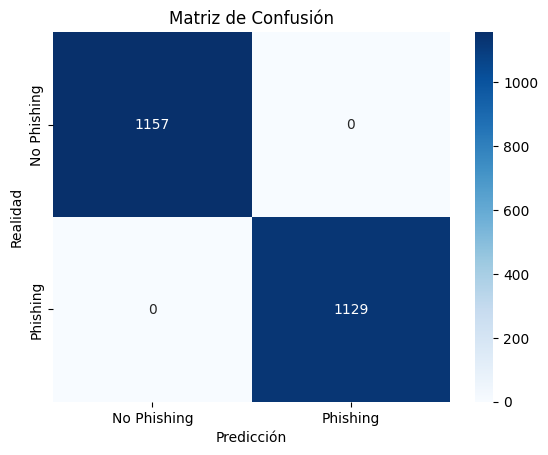

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df[['ip', 'status']], df['status'], test_size=0.2, random_state=42)

# Entrenar modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Phishing', 'Phishing'], yticklabels=['No Phishing', 'Phishing'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

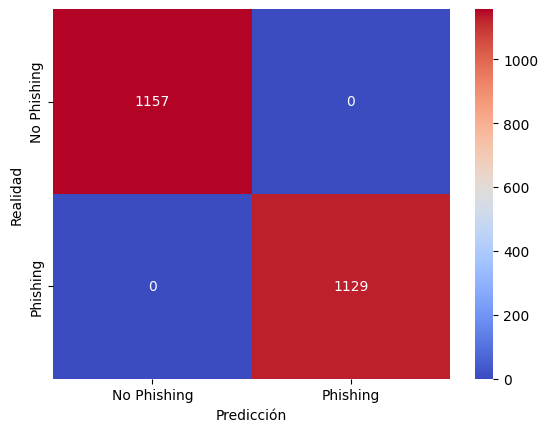

Precisión del modelo: 1.00


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df[['ip', 'status']], df['status'], test_size=0.2, random_state=42)

# Entrenar modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Phishing', 'Phishing'], yticklabels=['No Phishing', 'Phishing'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

print(f'Precisión del modelo: {accuracy:.2f}')


------------

# Task 2.1 - Regresión Logística

gus

------------

# Task 2.2 - K-Nearest Neighbors

gus